In [1]:
from PIL import Image
import numpy as np
from PIL import ImageChops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt
from random import randint

Ukrywanie informacji w obrazie

In [2]:
im_kod = Image.open('kod.bmp')
print("tryb", im_kod.mode)
print("rozmiar", im_kod.size)
obraz = Image.open('jesien.jpg')
print("tryb", obraz.mode)
print("rozmiar", obraz.size)



tryb L
rozmiar (960, 540)
tryb RGB
rozmiar (960, 540)


In [3]:
def ukryj_kod(obraz, im_kod):
    t_obraz = np.asarray(obraz)
    t_kodowany = t_obraz.copy()
    h, w, d = t_obraz.shape
    t_kod = np.asarray(im_kod)
    for i in range(h):
        for j in range(w):
            if t_kod[i, j] > 0:
                k = randint(0, 2)
                t_kodowany[i, j, k] = np.clip(np.int16(t_obraz[i, j, k]) + 1, 0, 255).astype(
                    np.uint8)  # rozszerzam typ uint8 żeby móc dodać 1 a potem obciąć do 255
    return Image.fromarray(t_kodowany)

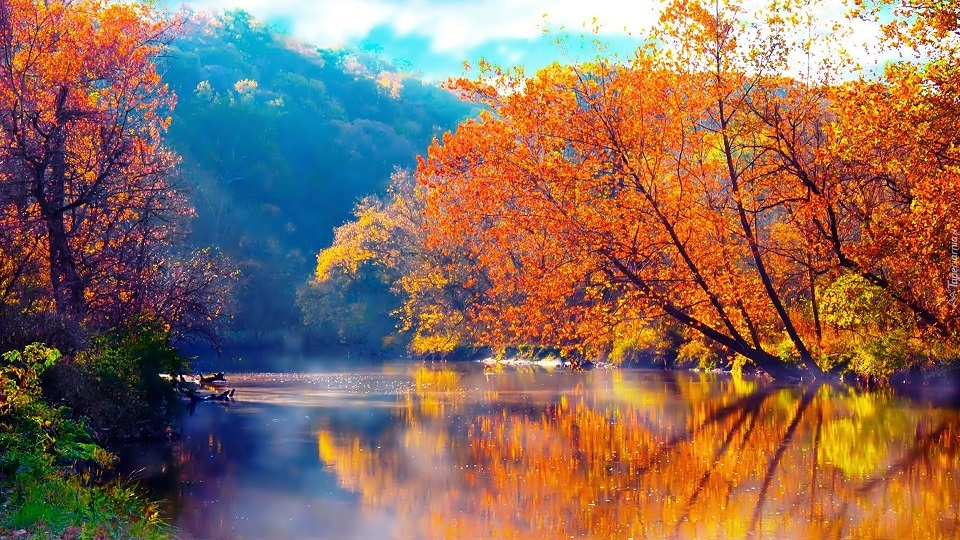

In [4]:
im_kodowany = ukryj_kod(obraz, im_kod)
im_kodowany

Próba odkrycia kodu z użyciem ImageChops.difference (nieskuteczna)

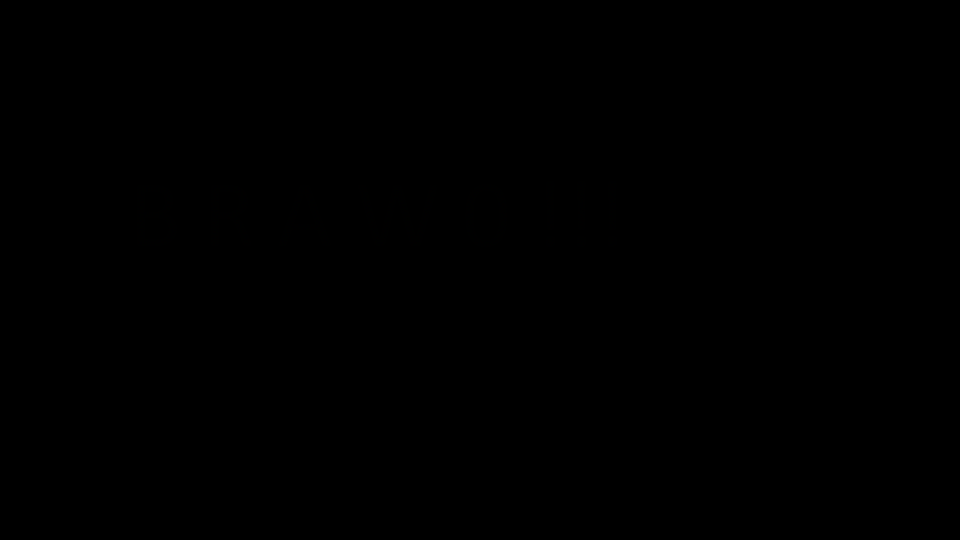

In [5]:
odkodowany = ImageChops.difference(obraz, im_kodowany)
odkodowany

6. Napisz funkcję ocen_czy_identyczne(obraz1, obraz2), która sprawdza czy dwa obrazy są identyczne. Funkcja musi uwzględniać tryb obrazu, rozmiar obrazu, wartości pikseli. Na wyjściu powinien pojawić się komunikat "obrazy identyczne” lub „obrazy nie są identyczne, bo …” (w miejsce … wstawić uzasadnienie np. „obrazy mają różne tryby”).\
    a. Zastosuj funkcję do porównania obrazu beksinski.png z obrazami beksinski1.png, beksinski2.png, beksinski3.png.

In [6]:
def ocen_czy_identyczne(obraz1, obraz2):
    t_obraz1 = np.asarray(obraz1)
    t_obraz2 = np.asarray(obraz2)
    roznice_pikseli = []
    if len(t_obraz1.shape) == 3:
        obraz1_w, obraz1_h, obraz1_d = t_obraz1.shape
        obraz2_w, obraz2_h, obraz2_d = t_obraz2.shape
    else:
        obraz1_w, obraz1_h = t_obraz1.shape
        obraz2_w, obraz2_h = t_obraz2.shape
    min_x = min(obraz1_w, obraz2_w)
    min_y = min(obraz1_h, obraz2_h)
    for h in range(min_y):
        for w in range(min_x):
            for k in range(3):
                if t_obraz1[w, h, k] != t_obraz2[w, h, k]:
                    roznice_pikseli.append((w, h))
    if obraz1.mode != obraz2.mode:
        print("Obrazy nie są identyczne bo, obrazy mają różne tryby")
    elif obraz1.size != obraz2.size:
        print("Obrazy nie są identyczne bo, obrazy mają różne rozmiary")
    elif obraz1.format != obraz2.format:
        print("Obrazy nie są identyczne bo, obrazy mają różne formaty")
    elif len(roznice_pikseli) > 0:
        print("Obrazy nie są identyczne bo, obrazy mają inne wartości pikseli:")
        for wsp in roznice_pikseli[:5]:
            print(wsp)
    else:
        print("Obrazy są identyczne.")


im_beksinski = Image.open('beksinski.png')
im_beksinski1 = Image.open('beksinski1.png')
im_beksinski2 = Image.open('beksinski2.png')
im_beksinski3 = Image.open('beksinski3.png')
print('beskinski vs beksinski1')
ocen_czy_identyczne(im_beksinski, im_beksinski1)
print('\nbeskinski vs beksinski2')
ocen_czy_identyczne(im_beksinski, im_beksinski2)
print('\nbeskinski vs beksinski3')
ocen_czy_identyczne(im_beksinski, im_beksinski3)

beskinski vs beksinski1
Obrazy nie są identyczne bo, obrazy mają różne tryby

beskinski vs beksinski2
Obrazy nie są identyczne bo, obrazy mają różne rozmiary

beskinski vs beksinski3
Obrazy nie są identyczne bo, obrazy mają inne wartości pikseli:
(148, 51)
(149, 51)
(150, 51)
(151, 51)
(152, 51)


7. Napisz funkcję pokaz_roznice(obraz_wejsciowy), która tworzy nowy obraz obraz_wynikowy (w trybie obrazu wejściowego) na którym zwiększone są wartości przez skalowanie tzn. na każdym kanale zmieniamy wartości elementów tablicy obrazu według reguły (wartosc_elementu/ max_wartosc_kanalu) *255\
    a. W zadaniu 2c w Lab 5 powstał obraz po trzykrotnym zapisie w formacie jpg. Nazwij ten obraz im_jpg3\
    b. Utwórz obraz diff zawierający różnice między obrazami im z poprzednich ćwiczeń i im_jpg3\
    c. Umieść na jednej figurze plt (fig2.png) obrazy im ,_jpg3 , diff oraz obraz otrzymany z funkcji pokaz_roznice(diff)

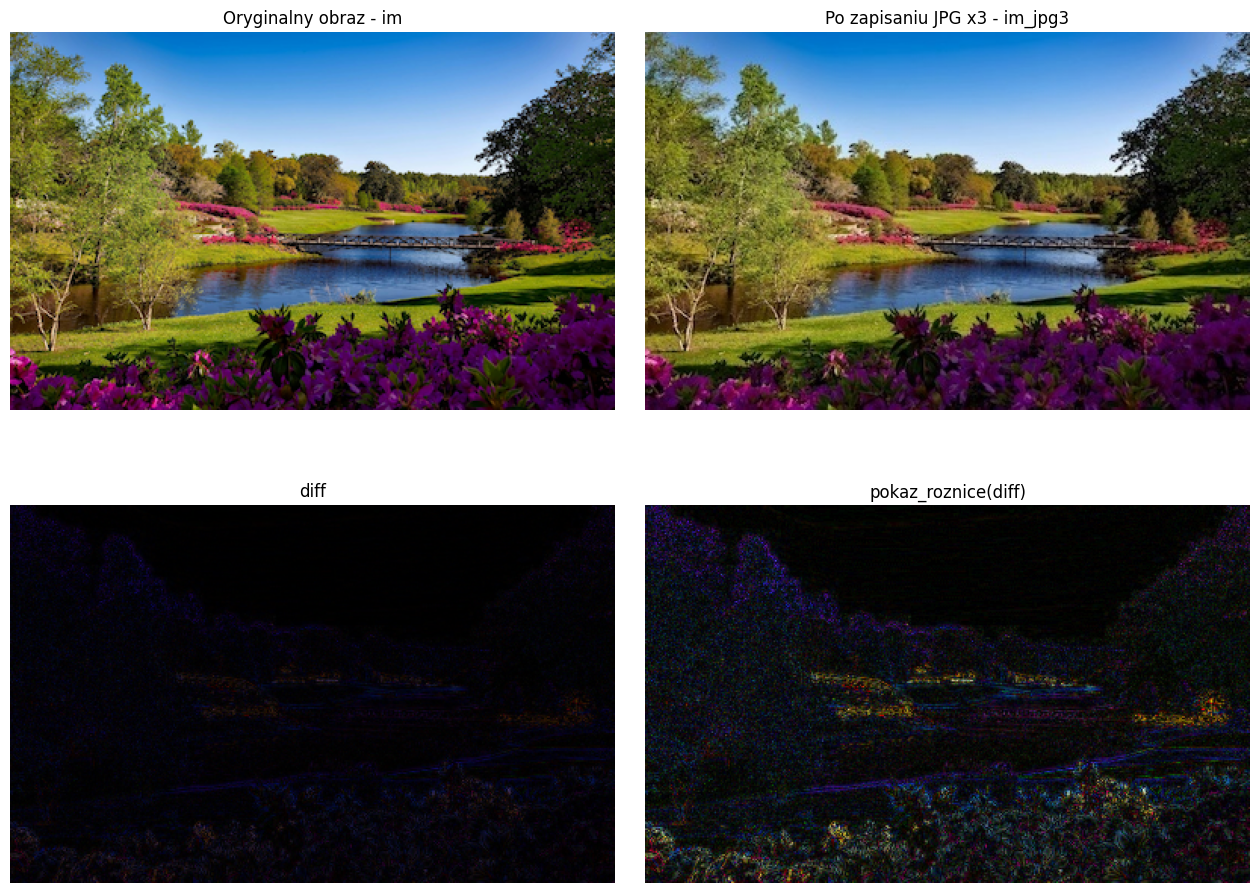

In [7]:
def pokaz_roznice(obraz_wejsciowy):
    t_obraz = np.asarray(obraz_wejsciowy)
    if len(t_obraz.shape) == 3:
        w, h, d = t_obraz.shape
    else:
        w, h = t_obraz.shape
        d = 1
    t_wynik = np.copy(t_obraz)

    for k in range(d):
        max_wartosc_kanal = np.max(t_obraz[:, :, k])
        if max_wartosc_kanal != 0:
            t_wynik[:, :, k] = (t_obraz[:, :, k] / max_wartosc_kanal) * 255
        else:
            t_wynik[:, :, k] = 0
    obraz_wynik = Image.fromarray(t_wynik)
    return obraz_wynik


im_jpg3 = Image.open('im_jpg3.jpg')
im = Image.open('im.png')
diff = ImageChops.difference(im, im_jpg3)
diff_pokaz = pokaz_roznice(diff)

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
plt.title("Oryginalny obraz - im")
plt.axis('off')
plt.imshow(im)
plt.subplot(2, 2, 2)
plt.title("Po zapisaniu JPG x3 - im_jpg3")
plt.axis('off')
plt.imshow(im_jpg3)
plt.subplot(2, 2, 3)
plt.title("diff")
plt.axis('off')
plt.imshow(diff)
plt.subplot(2, 2, 4)
plt.title("pokaz_roznice(diff)")
plt.axis('off')
plt.imshow(diff_pokaz)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('fig2.png')
plt.show()

8. Napisz funkcję wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, kolor). Obraz_wstawiany jest obrazem w trybie 1, na którym są inicjały w kolorze czarnym na białym tle. W miejscu (m, n) w obrazie bazowym wstawiamy inicjały w kolorze kolor (tam, gdzie były białe piksele obraz bazowy się nie zmienia, a kolor pojawia się tylko w miejscu czarnych pikseli). Gdyby obraz_wstawiany miał wyjść poza ramy obrazu bazowego należy go przyciąć (jak w funkcji wstaw_obraz_w_obraz(obraz_bazowy, obraz_wstawiany, m, n) z Lab2). Na przykład, obraz obok powstał po zastosowaniu funkcji wstaw_inicjaly(im, inicjaly, 280, 390, [0,255,0])\
    a. Zastosuj funkcję do obrazu im wybranego na poprzednich ćwiczeniach i wstaw własne inicjały w 3 różnych kolorach:\
        1. w prawym górnym rogu,\
        2. w lewym dolnym rogu,\
        3. w połowie wysokości tak, żeby było widać tylko pierwszą literę inicjałów.\
        4. obraz wynikowy zapisz jako obraz_inicjaly.png

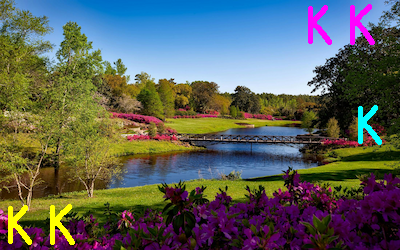

In [8]:
def wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, kolor):
    t = np.asarray(obraz_bazowy, dtype=np.uint8)
    t_obraz_bazowy = np.copy(t)
    t_obraz_wstawiany = np.asarray(obraz_wstawiany)

    h_ob, w_ob, d = t_obraz_bazowy.shape
    h_ow, w_ow = t_obraz_wstawiany.shape
    n_k = min(h_ob, n + h_ow)
    m_k = min(w_ob, m + w_ow)
    n_p = max(0, n)
    m_p = max(0, m)

    for h in range(n_p, n_k):
        for w in range(m_p, m_k):
            if t_obraz_wstawiany[h - n, w - m] == 0:
                t_obraz_bazowy[h, w] = kolor
    return Image.fromarray(t_obraz_bazowy)


inicjaly = Image.open('inicjaly.bmp')
im_wstawione = wstaw_inicjaly(im, inicjaly, 400 - 100, 0, [255, 0, 255])
im_wstawione = wstaw_inicjaly(im_wstawione, inicjaly, 0, 250 - 50, [255, 255, 0])
im_wstawione = wstaw_inicjaly(im_wstawione, inicjaly, 400 - 50, (250 - 50) // 2, [0, 255, 255])
im_wstawione

9. Obraz zakodowany1.bmp powstał tak, że zastosowałam funkcję ukryj_kod(obraz, im_kod), gdzie obraz jest wczytanym obrazem jesien.jpg, a im_kod jest wczytanym obrazem kod.bmp.\
    a. Napisz funkcję odkoduj(obraz1, obraz2), która wczytuje dwa obrazy, a na wyjściu podaje obraz w trybie L ilustrujący różnice w ten sposób, że piksele różne wyświetlają się na biało a piksele równe na czarno. Na przykład, wczytujemy jesien.jpg oraz zakodowany1.bmp a wynikiem funkcji jest kod.bmp.\
    b. Zastosuj funkcję odkoduj do obrazów jesien.jpg oraz zakodowany1.bmp. Otrzymany obraz zapisz jako kod2.bmp.

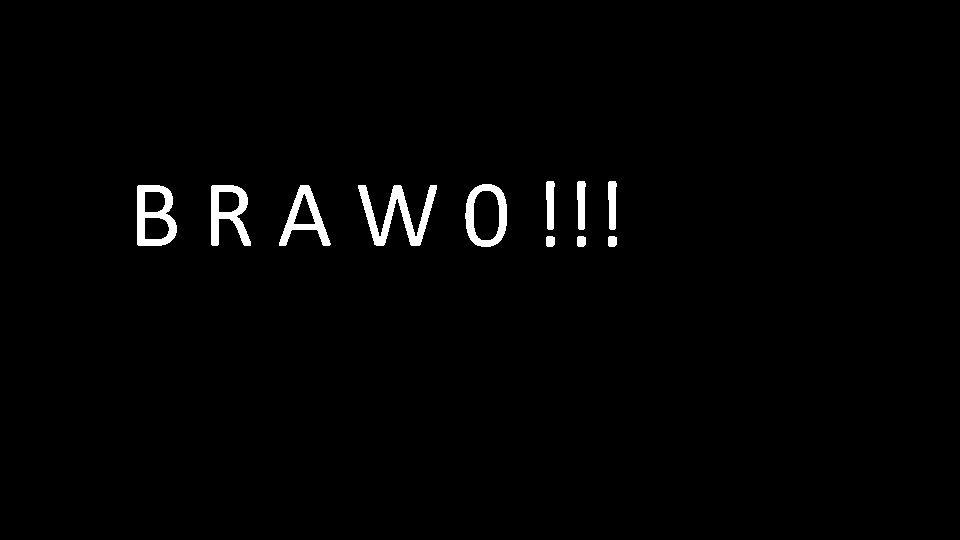

In [9]:
def odkoduj(obraz1, obraz2):
    t1 = np.asarray(obraz1)
    t2 = np.asarray(obraz2)
    """Wersja krótsza z użyciem np.any
    np.any zwraca tablice ktora zawiera wartości bool na każdej współrzędnej
    """
    roznice = np.any(t1 != t2, axis=2)
    roznice = roznice.astype(np.uint8) * 255
    """Wersja dłuższa z przechodzeniem pętlą po każdej współrzędnej"""
    h, w, d = t1.shape
    kod = np.zeros((h, w), dtype=np.uint8)

    for i in range(h):
        for j in range(w):
            r1, g1, b1 = t1[i, j]
            r2, g2, b2 = t2[i, j]

            if r1 != r2 or g1 != g2 or b1 != b2:
                kod[i, j] = 255
            else:
                kod[i, j] = 0
    return Image.fromarray(kod, mode="L")


zakodowany = Image.open('zakodowany1.bmp')
jesien = Image.open('jesien.jpg')
odkodowany = odkoduj(zakodowany, jesien)
odkodowany